In [438]:
import pandas as pd
import os

In [439]:
os.getcwd()

'/Users/abdullahmahar/Desktop/Python A-Z'

In [440]:
movies=pd.read_csv('P4-Movie-Ratings.csv')

In [441]:
movies.head(11)

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
5,2012,Action,39,63,200,2009
6,27 Dresses,Comedy,40,71,30,2008
7,30 Days of Night,Horror,50,57,32,2007
8,30 Minutes or Less,Comedy,43,48,28,2011
9,50/50,Comedy,93,93,8,2011


In [442]:
movies.columns=['Film', 'Genre', 'Critic_Ratings', 'Audience_Ratings',
       'Budget', 'Year_of_release']

In [443]:
movies.Film=movies.Film.astype('category')
movies.Genre=movies.Genre.astype('category')
movies.Year_of_release=movies.Year_of_release.astype('category')

In [444]:
movies.Genre.cat.categories       #all unique categories in Genre

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [445]:
movies.describe()

,Critic_Ratings,Audience_Ratings,Budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


-----

In [446]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

-----

# JOINTPLOT

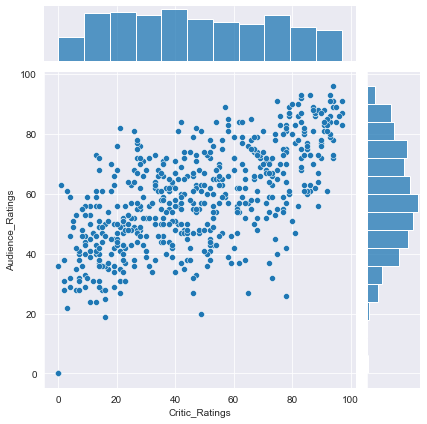

In [448]:
sns.set_style('darkgrid')      #change styles using this function

j= sns.jointplot(data=movies, x='Critic_Ratings' , y='Audience_Ratings')


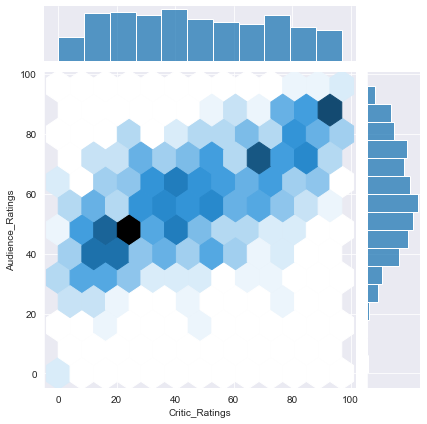

In [449]:
sns.jointplot(data=movies, x='Critic_Ratings' , y='Audience_Ratings', kind='hex')
plt.show()

# histograms

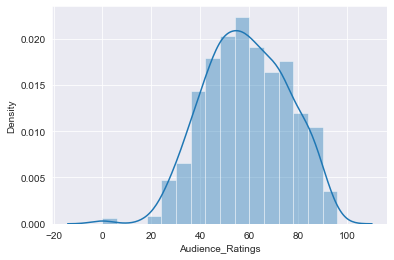

In [451]:
H1= sns.distplot(movies.Audience_Ratings)

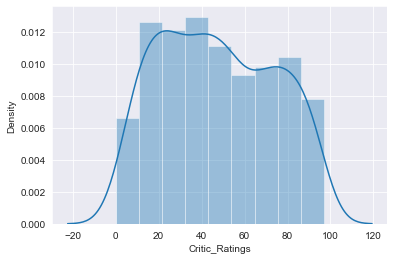

In [452]:
H2= sns.distplot(movies.Critic_Ratings)               #with seaborn

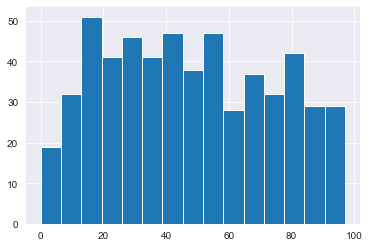

In [453]:
H3=plt.hist(movies.Critic_Ratings , bins=15)      #without seaborn  (pyplot)


# stacked histograms

In [455]:
#Budget for Drama films only
movies[movies.Genre == 'Drama']

,Film,Genre,Critic_Ratings,Audience_Ratings,Budget,Year_of_release
10,88 Minutes,Drama,5,51,30,2007
11,A Dangerous Method,Drama,79,89,20,2011
13,A Serious Man,Drama,89,64,7,2009
18,Albert Nobbs,Drama,53,43,8,2011
23,All Good Things,Drama,33,64,20,2010
...,...,...,...,...,...,...
529,War Horse,Drama,77,73,66,2011
532,Water For Elephants,Drama,60,72,38,2011
534,We Own the Night,Drama,55,63,21,2007
541,Whip It,Drama,84,73,15,2009


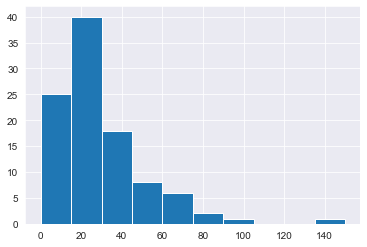

In [456]:
plt.hist(movies[movies.Genre == 'Drama'].Budget)
plt.show()

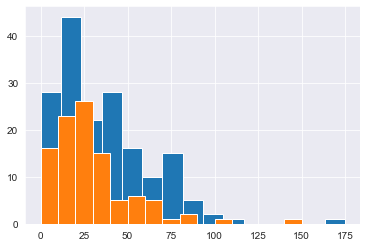

In [457]:
#multiple Genres 

plt.hist(movies[movies.Genre == 'Comedy'].Budget , bins= 15)
plt.hist(movies[movies.Genre == 'Drama'].Budget , bins= 15)
plt.show()


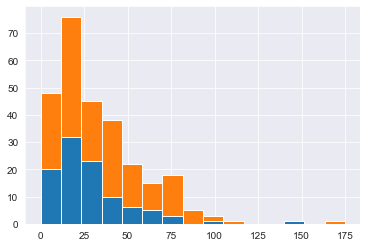

In [458]:

# To make it even better make a list of multiple filters of genres and then plot.

[movies[movies.Genre == 'Drama'].Budget ,movies[movies.Genre == 'Comedy'].Budget]

plt.hist([movies[movies.Genre == 'Drama'].Budget , \
          movies[movies.Genre == 'Comedy'].Budget], \
         bins= 15, stacked=True)

plt.show()




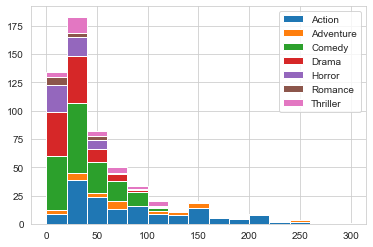

In [459]:
#for multiple genres create a loop to save time

list1=[]
labels=[]

for genre in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == genre].Budget)
    labels.append(genre)
    
sns.set_style('whitegrid')
plt.hist(list1, bins=15 , rwidth=1,stacked=True , label = labels)
plt.legend()
plt.show()


    

-----

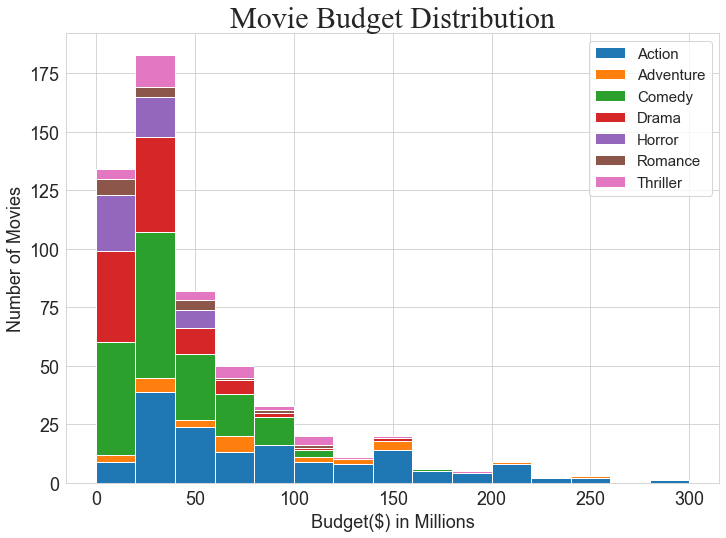

In [460]:
#Customized histogram   ----     to customize a plt create a subplot first

fig , ax=plt.subplots()
fig.set_size_inches(11.7 , 8.27)
plt.hist(list1, bins=15 , rwidth=1,stacked=True , label = labels)
plt.title('Movie Budget Distribution' , fontsize=30 , fontname= 'Times New Roman')
plt.ylabel("Number of Movies" , fontsize=18)
plt.xlabel('Budget($) in Millions', fontsize=18 )
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={'size':15},frameon=True)
plt.show()





----

# Lmplot

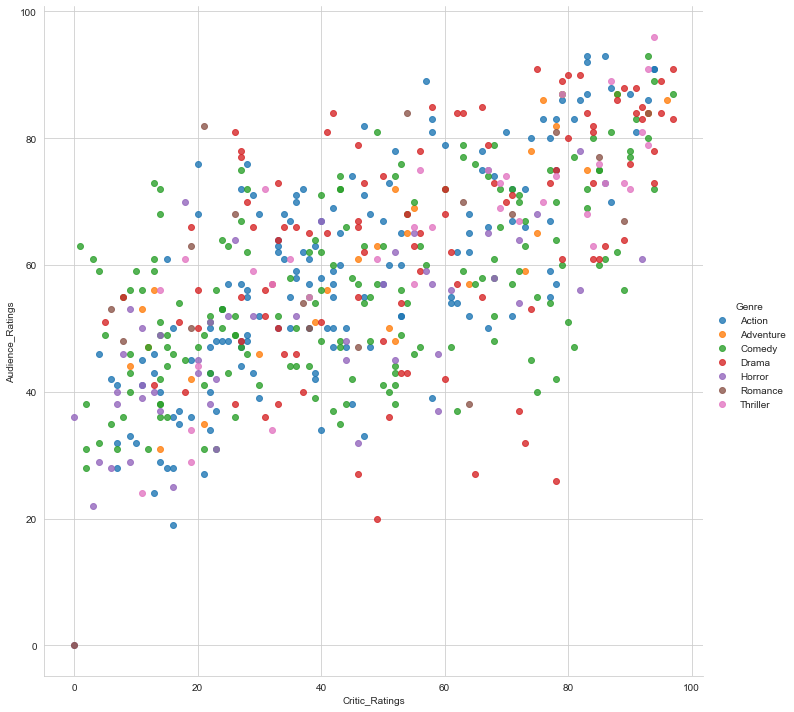

In [461]:
sns.lmplot('Critic_Ratings','Audience_Ratings',movies,hue= 'Genre' , \
           size=10 , fit_reg=False , aspect=1, )
plt.show()


-----

# Kdeplot

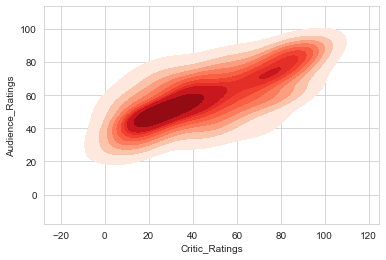

In [462]:
K1= sns.kdeplot(movies.Critic_Ratings,movies.Audience_Ratings , shade=True, \
               shade_lowest=False, cmap='Reds')

-----

# Subplot( )

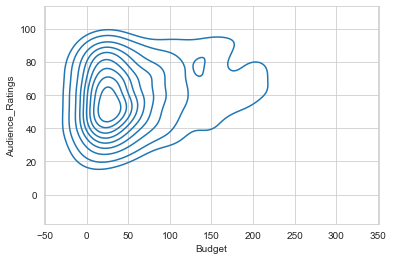

In [464]:
sns.kdeplot(movies.Budget , movies.Audience_Ratings )
plt.show()

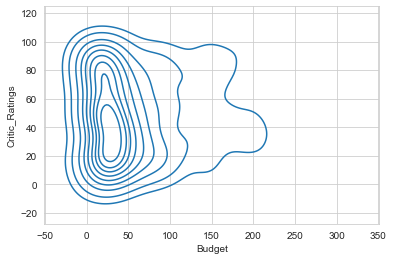

In [465]:
sns.kdeplot(movies.Budget , movies.Critic_Ratings )
plt.show()

# To create dashboards

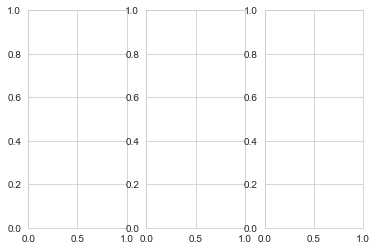

In [466]:
f, axes = plt.subplots(1,3)      # 1,3 means 1 row three columns

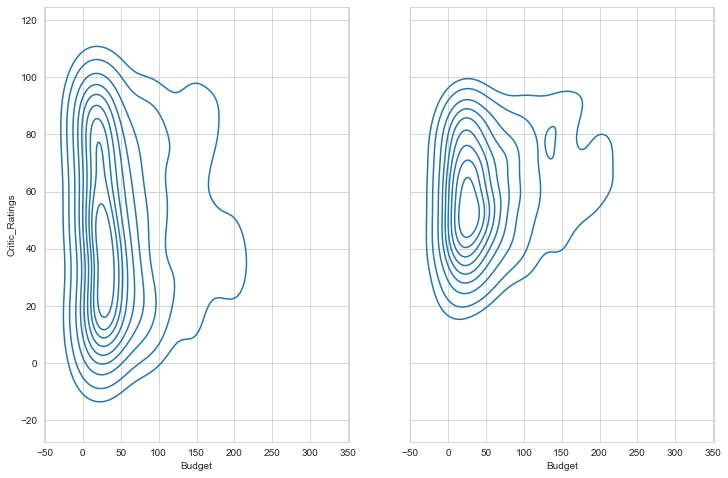

In [467]:
f, axes = plt.subplots(1,2 , figsize=(12,8) , sharex=True , sharey=True)   #sharex/sharey=True for axes to be same
                                                                           
k1=sns.kdeplot(movies.Budget , movies.Critic_Ratings , ax=axes[0] )
k2=sns.kdeplot(movies.Budget , movies.Audience_Ratings , ax=axes[1] )


[(0.0, 120.0)]

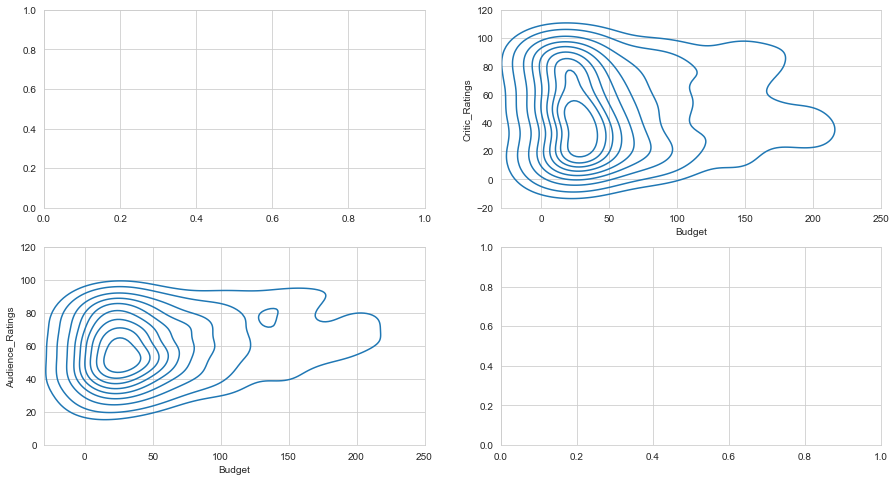

In [468]:
f, axes = plt.subplots(2,2 , figsize=(15,8))       #in 2-d subplots you have to specify row and column
                                                    

k1=sns.kdeplot(movies.Budget , movies.Critic_Ratings , ax=axes[0,1] )
k2=sns.kdeplot(movies.Budget , movies.Audience_Ratings , ax=axes[1,0] )
k1.set(xlim=(-30,250))
k2.set(xlim=(-30,250))  # xlim and ylim to set x and y axis limits
k1.set(ylim=(-20,120)) 
k2.set(ylim=(0,120))

-----

# Boxplots

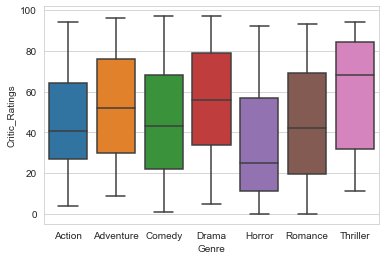

In [470]:
B1= sns.boxplot(data=movies , x='Genre' , y='Critic_Ratings')

# Violin Plots

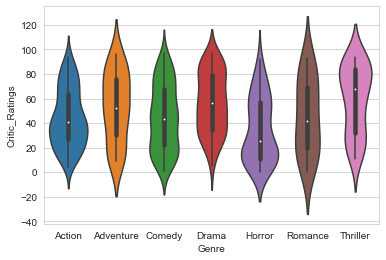

In [472]:
V1= sns.violinplot(data=movies , x='Genre' , y='Critic_Ratings')

# Facet grid

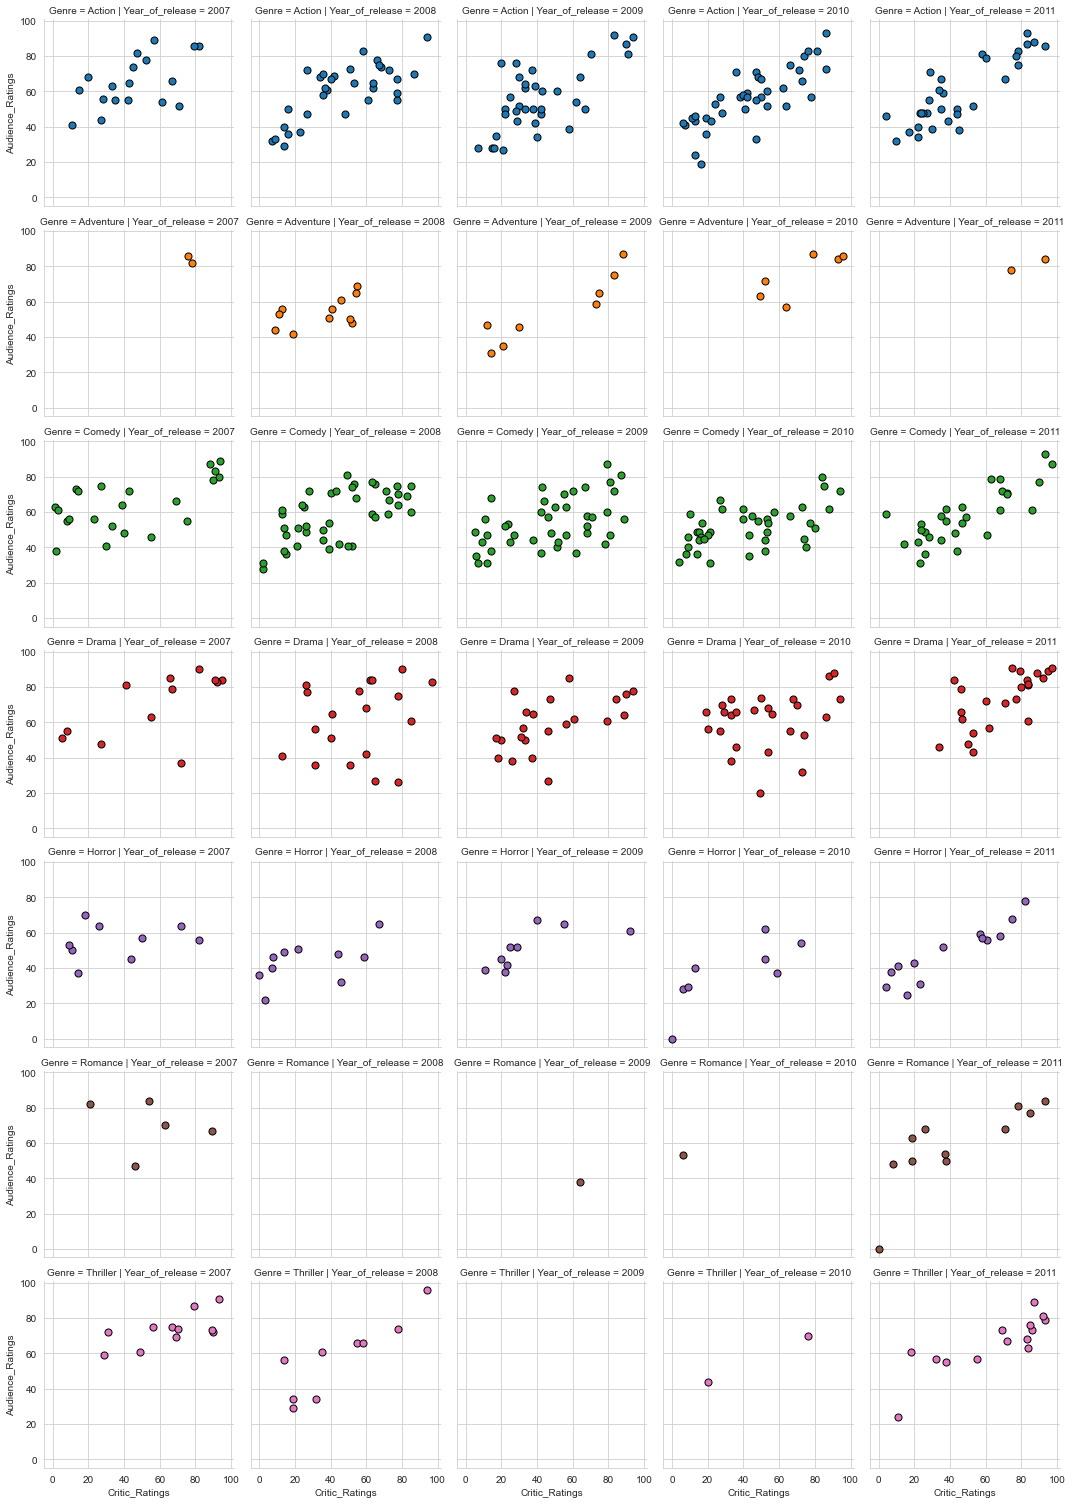

In [474]:

FG= sns.FacetGrid(movies , row='Genre' , col='Year_of_release' , hue='Genre')
FG.map(plt.scatter,'Critic_Ratings','Audience_Ratings',**KWS)    # to populate the Facet grig usse .map function
plt.show()

#to customize create a dict for keyword arguments and add it .map function with **

KWS=dict(s=50 , linewidth=1 , edgecolor='black')



-----

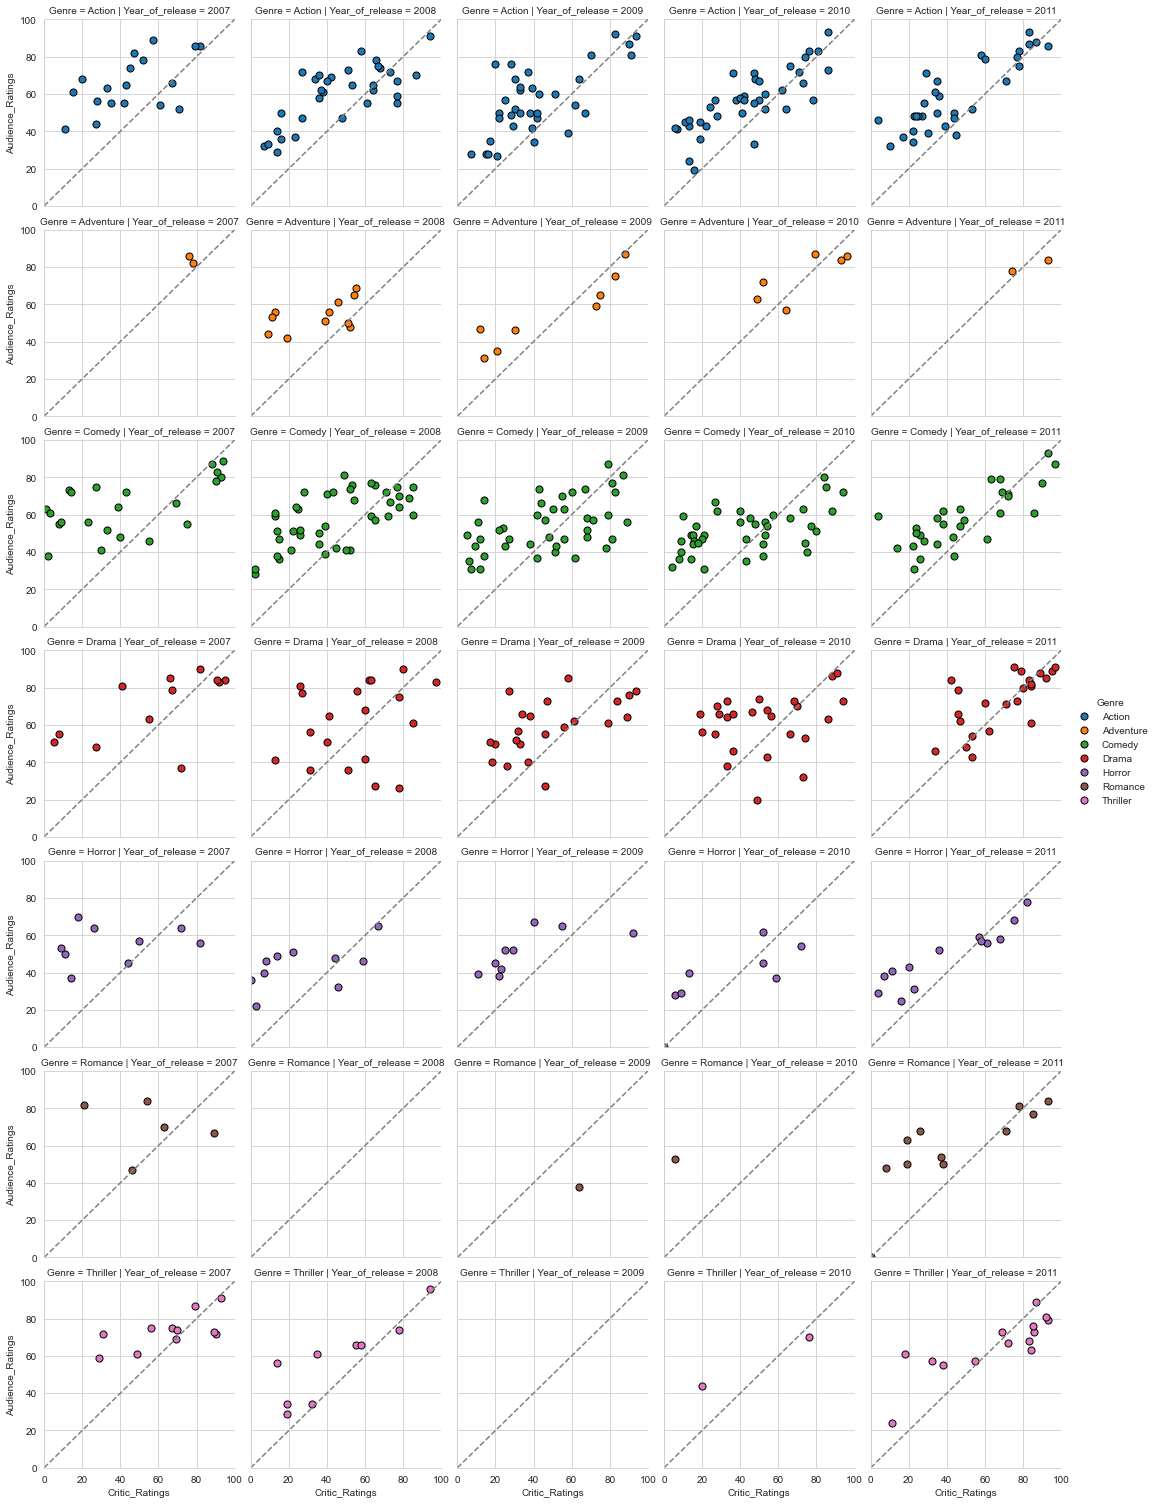

In [475]:
#Controlling axes and adding diagonals

FG= sns.FacetGrid(movies , row='Genre' , col='Year_of_release' , hue='Genre')

KWS=dict(s=50 , linewidth=1 , edgecolor='black')

FG.map(plt.scatter,'Critic_Ratings','Audience_Ratings',**KWS)   
FG.set(xlim=(0,100),ylim=(0,100))                                # <<<<<< For controlling axes
for ax in FG.axes.flat:
    ax.plot((0,100),(0,100) , c='grey' , ls='--')                # <<<<<< For diagonal 
FG.add_legend()
plt.show()





-----

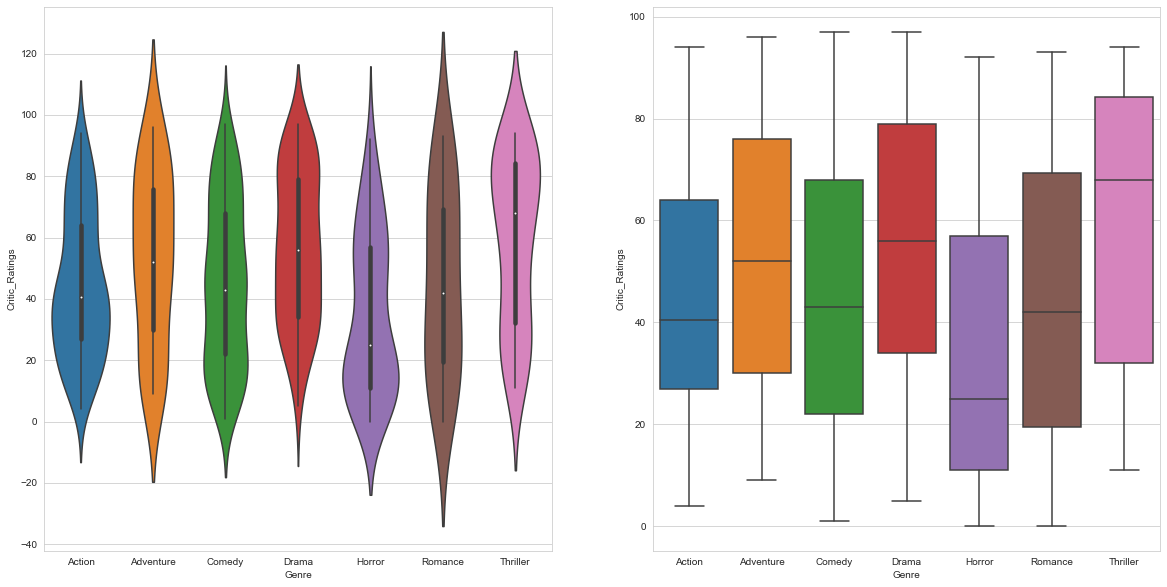

In [477]:
# same as using plt.subplots() , You can show different graphs at once

f , axes = plt.subplots(1,2 , figsize=(20,10) , sharex=True)
V1= sns.violinplot(data=movies , x='Genre' , y='Critic_Ratings' , ax=axes[0])
B1= sns.boxplot(data=movies , x='Genre' , y='Critic_Ratings' , ax=axes[1])

#if the graph is not sns uses 'axes[].' Function

----


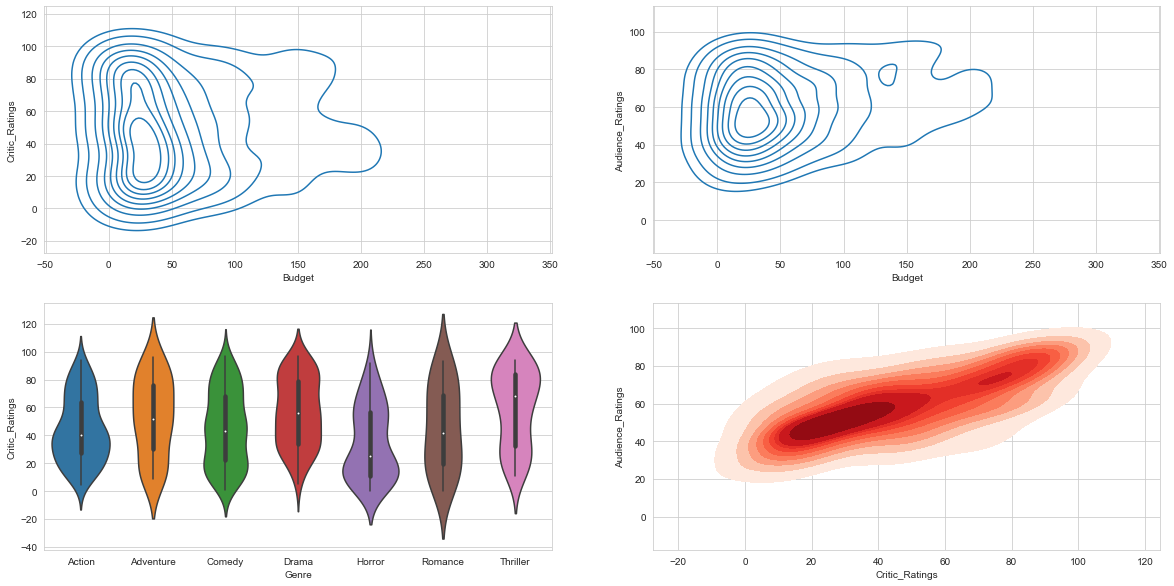

In [478]:
f , axes = plt.subplots(2,2 , figsize=(20,10))
k1=sns.kdeplot(movies.Budget , movies.Critic_Ratings , ax=axes[0,0] )
k2=sns.kdeplot(movies.Budget , movies.Audience_Ratings , ax=axes[0,1] )
V1=sns.violinplot(data=movies , x='Genre' , y='Critic_Ratings' , ax=axes[1,0])
K1= sns.kdeplot(movies.Critic_Ratings,movies.Audience_Ratings , shade=True, \
               shade_lowest=False, cmap='Reds' , ax=axes[1,1])

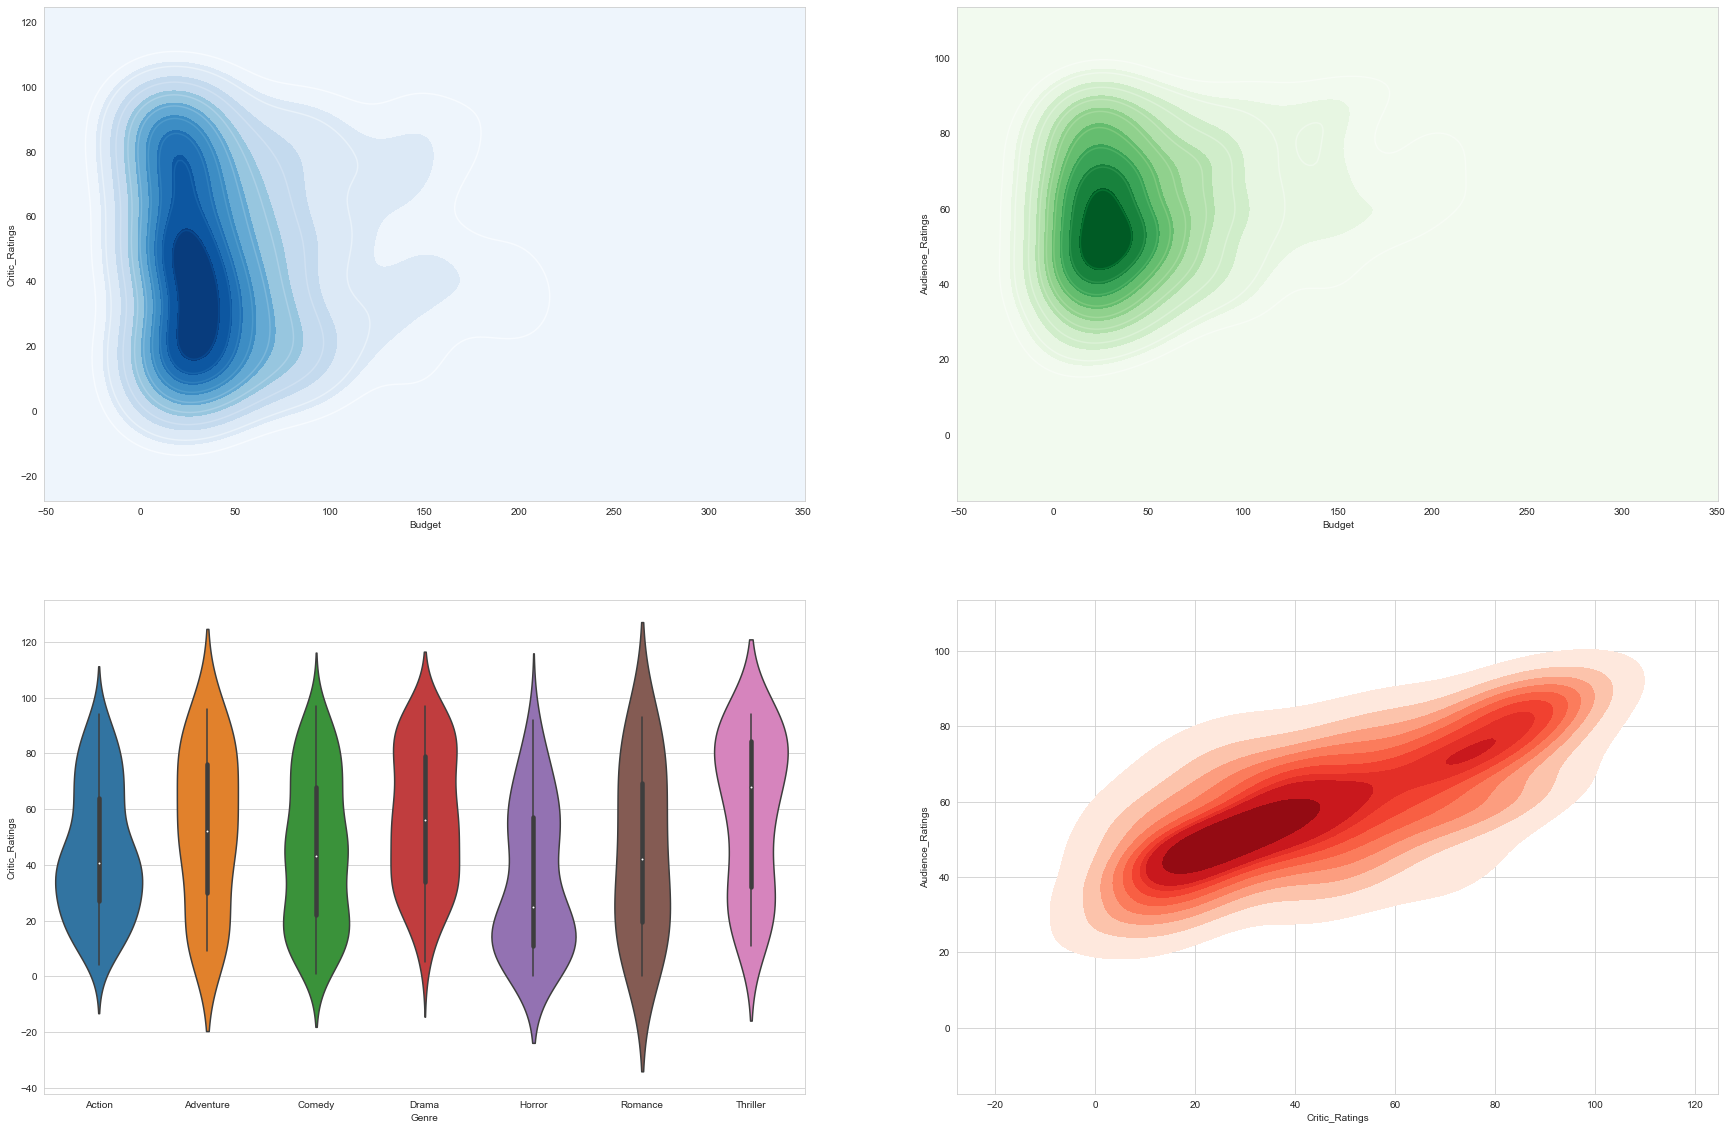

In [486]:
#styling

sns.set_style('whitegrid' , {'axes.facecolor':'White'})

f , axes = plt.subplots(2,2 , figsize=(30,20))
k1=sns.kdeplot(movies.Budget , movies.Critic_Ratings , ax=axes[0,0] , shade=True ,shade_lowest=True , \
              cmap='Blues')
k1b=sns.kdeplot(movies.Budget , movies.Critic_Ratings , ax=axes[0,0] , \
              cmap='Blues')                                                #K1b for outline



k2=sns.kdeplot(movies.Budget , movies.Audience_Ratings , ax=axes[0,1] , shade=True ,shade_lowest=True , \
              cmap='Greens') 
k2b=sns.kdeplot(movies.Budget , movies.Audience_Ratings , ax=axes[0,1] , \
              cmap='Greens')

V1=sns.violinplot(data=movies , x='Genre' , y='Critic_Ratings' , ax=axes[1,0])

K1= sns.kdeplot(movies.Critic_Ratings,movies.Audience_Ratings , shade=True, \
               shade_lowest=False, cmap='Reds' , ax=axes[1,1])
